# Przewidywanie ocen filmów na podstawie analizy sentymentu komentarzy na portalu Reddit

__Autorzy__: Jakub Wujec, Andrzej Żernaczuk  
__github__: https://github.com/kuba1302/Reddit_based_review_predictor

### Spis treści: 
1. Cel pracy oraz pytanie badawcze
2. Przygotowanie danych  
3. Modele
4. Wyniki 
5. Konkluzje

# 1. Cel pracy oraz pytanie badawcze 

### 1.1 Pytanie badawcze
Czy da się przewidzieć oceny filmów na podstawie analizy sentymentu na portalu reddit?

# 2. Przygotowanie danych

### 2.1 Eksploracja danych

Do wytrenowania modelu została użyte zostały dane z zawierających 1 600 000 tweetów wraz z oznaczeniem sentymentu.   
Link do danych: https://www.kaggle.com/kazanova/sentiment140


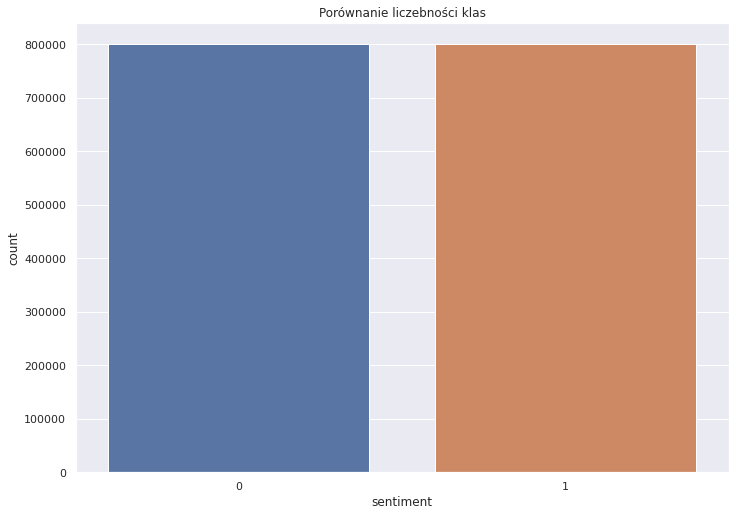

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('Data/twitter_data.csv', 
                      encoding='latin-1', names=['sentiment', 'id', 'date', 'flag', 'user',
                                                'text'])
data['sentiment'].replace(4, 1, inplace=True)
sns.countplot(x=data['sentiment'])
sns.set(rc={'figure.figsize':(30,30)})
plt.title('Porównanie liczebności klas')
plt.show()

### 2.2 Wstępna obróbka danych
- usunięcie znaków specjalnych
- usunięcie "\n" oraz "\r"
- usunięcie nazw wspomnianych przez autora postu innych użytkowników twittera

### 2.3 Usunięcie "stop words"
- użycie biblioteki nltk
- usunięcie słów takich jak ‘i’, ‘me’, ‘you’, które nie wnoszą informacji do zdania

### 2.4 Tokenizacja oraz padding
- użycie biblioteki tensorflow

### 2.5 Word2vec
- zamiana słów na wektory o wybranym wymiarze
- słowa o podobnym znaczeniu znajdują się w przestrzeni blisko siebie

### 2.6 Pobieranie danych z portalu reddit
- użycie biblioteki psaw, zawierającej API reddita 
- dla danego filmu pobieramy 1000 komentarzy oraz przeprowadzamy na nich analize sentymentu
- obliczamy średnią ważoną wyników, gdzie wagą jest liczba punktów przy danym komentarzu 


# 3. Modele

### 3.1 Sposoby trenowania modeli
- ze względu na bardzo duży zbiór danych, oraz skomplikowane obliczenia brak tuningu hiperparametrów oraz walidacji krzyżowej
- uczenie modelu na połowie zbioru danych ze względu na ogranicznia sprzętowe

### 3.2 CNN 
- optimizer : Adam
- funkcja straty: binary cross-entropy
- najlepszy wynik: 

![caption](Images/CNN.png)

### 3.3 LSTM
- optimizer : Adam
- funkcja straty: binary cross-entropy
- najlepszy wynik : 0.7887 na zbiorze walidacyjnym

![caption](Images/RNN.png)

### __W związku z zauważalnie lepszymi wynikami dla modelu LSTM to on zostanie wykorzystany w dalszej pracy__ 

# 4. Wyniki 

### 4.1 Średni błąd
![caption](Images/Wyniki.png)

### 4.2 Wykres dla Metacritic
![caption](Images/Metacritic_error.png)

### 4.3 Wykres dla IMDB
![caption](Images/IMDb_error.png)

### 4.4 Wykres dla Rotten Tomatoes
![caption](Images/RottenTomatoes_error.png)


# 5. Konkluzje
### 5.1 Nie udało nam się uzyskać satysfakcjonującej dokładności
### 5.2 Możliwe powody: 
1. Inny charakter reddita od klasycznych social mediów
2. Bańki informacyjne
3. Subbredit poświęcony kinematografii zrzesza ludzi zainteresowanych kinem, przy portalach takich jak IMDB czy RottenTomatoes zabierają głos "niedzielni" kinomaniacy